# Random Forest Classifier

In [1]:
# Import dependencies for ML
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report


In [2]:
# Import Dependencies for Database
from config import password
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect
import psycopg2
import pandas as pd

/Users/juhiaggarwal/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/psycopg2/__init__.py:144: UserWarning: The psycopg2 wheel package will be renamed from release 2.8; in order to keep installing from binary please use "pip install psycopg2-binary" instead. For details see: <http://initd.org/psycopg/docs/install.html#binary-install-from-pypi>.
  """)


In [3]:
db_string = f"postgresql+psycopg2://postgres:" + password + "@127.0.0.1:5434/WineEnthusiast"

In [4]:
engine = create_engine(db_string)

In [5]:
inspector = inspect(engine)

In [6]:
inspector.get_table_names()

['us_wine', 'wine_us', 'wineregion', 'winedata_ml']

In [7]:
connection = engine.connect

In [8]:
session = Session(engine)

In [9]:
engine.execute("SELECT * from us_wine")

In [10]:
col_names_list = []

#i = 0
for i in range(len(inspector.get_columns('us_wine'))):
    col_names_list.append(inspector.get_columns('us_wine')[i]['name'])
    
for i in range(len(inspector.get_columns('wineregion'))):
    col_names_list.append(inspector.get_columns('wineregion')[i]['name'])
    
print(col_names_list)

['index', 'description', 'points', 'price', 'province', 'region_1', 'title', 'variety', 'winery', 'type', 'index', 'region', 'Latitude', 'Longitude']


In [11]:
US_wine_data_df = pd.DataFrame(columns = col_names_list)

In [12]:
# Inner join for wines and regions
import sys
join_db = engine.execute("SELECT * from us_wine inner join wineregion on us_wine.region_1 = wineregion.region")
for record in join_db:
    record_series = pd.Series(list(record), index = US_wine_data_df.columns)
    
    US_wine_data_df = US_wine_data_df.append(record_series, ignore_index=True)
    #print(list(record))

In [21]:
US_wine_data_df_copy = US_wine_data_df

In [25]:
US_wine_data_df_copy.head()

,description,points,price,province,title,variety,winery,type,region,Latitude,Longitude
0,"Tart and snappy, the flavors of lime flesh and...",87,14.0,Oregon,Rainstorm 2013 Pinot Gris,Pinot Gris,Rainstorm,White,Willamette Valley,44.942554,-122.933762
1,"Tart and snappy, the flavors of lime flesh and...",87,14.0,Oregon,Rainstorm 2013 Pinot Gris,Pinot Gris,Rainstorm,White,Willamette Valley,44.942554,-122.933762
2,"Much like the regular bottling from 2012, this...",87,65.0,Oregon,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks,Red,Willamette Valley,44.942554,-122.933762
3,"Much like the regular bottling from 2012, this...",87,65.0,Oregon,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks,Red,Willamette Valley,44.942554,-122.933762
4,"Soft, supple plum envelopes an oaky structure ...",87,19.0,California,Kirkland Signature 2011 Mountain Cuvée Caberne...,Cabernet Sauvignon,Kirkland Signature,Red,Napa Valley,38.502469,-122.265389


In [22]:
us_wine_data_copy = US_wine_data_df_copy

In [23]:
us_wine_data_copy.head()

,description,points,price,province,title,variety,winery,type,region,Latitude,Longitude
0,"Tart and snappy, the flavors of lime flesh and...",87,14.0,Oregon,Rainstorm 2013 Pinot Gris,Pinot Gris,Rainstorm,White,Willamette Valley,44.942554,-122.933762
1,"Tart and snappy, the flavors of lime flesh and...",87,14.0,Oregon,Rainstorm 2013 Pinot Gris,Pinot Gris,Rainstorm,White,Willamette Valley,44.942554,-122.933762
2,"Much like the regular bottling from 2012, this...",87,65.0,Oregon,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks,Red,Willamette Valley,44.942554,-122.933762
3,"Much like the regular bottling from 2012, this...",87,65.0,Oregon,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks,Red,Willamette Valley,44.942554,-122.933762
4,"Soft, supple plum envelopes an oaky structure ...",87,19.0,California,Kirkland Signature 2011 Mountain Cuvée Caberne...,Cabernet Sauvignon,Kirkland Signature,Red,Napa Valley,38.502469,-122.265389


In [24]:
us_wine_data_clean = us_wine_data_copy.drop(columns = ['region_1'], inplace=True)

KeyError: "['index' 'region_1'] not found in axis"

In [26]:
us_wine_data_clean.head()

NameError: name 'us_wine_data_clean' is not defined

In [31]:
us_wine_data_copy.drop_duplicates(inplace=True)

In [32]:
# joined data set with lat long and wine
us_wine_data_copy.to_sql(name='uswine_db', con=engine, method='multi')

In [ ]:
# # Cut this out
#Export data to csv
us_wine_data_copy.to_csv("Data/US_Wine_Join.csv", index=False)

In [ ]:
# Make a copy of the dataframe
us_wine_data_copy = US_wine_data_df
us_wine_data_copy.shape

## Remove special characters

In [33]:
# Clean winery and variety column
winery_test = us_wine_data_copy['winery'].str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8')
variety_test = us_wine_data_copy['variety'].str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8')
title_test = us_wine_data_copy['title'].str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8')
description_test = us_wine_data_copy['description'].str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8')


In [34]:
winery_df = pd.DataFrame({'winery_clean':winery_test,'variety_clean':variety_test, 
                          'title_clean':title_test,  'description_clean':description_test})
winery_df

,winery_clean,variety_clean,title_clean,description_clean
0,Rainstorm,Pinot Gris,Rainstorm 2013 Pinot Gris,"Tart and snappy, the flavors of lime flesh and..."
2,Sweet Cheeks,Pinot Noir,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,"Much like the regular bottling from 2012, this..."
4,Kirkland Signature,Cabernet Sauvignon,Kirkland Signature 2011 Mountain Cuvee Caberne...,"Soft, supple plum envelopes an oaky structure ..."
6,Louis M. Martini,Cabernet Sauvignon,Louis M. Martini 2012 Cabernet Sauvignon,"Slightly reduced, this wine offers a chalky, t..."
7,Mirassou,Chardonnay,Mirassou 2012 Chardonnay,Building on 150 years and six generations of w...
...,...,...,...,...
55849,Apriori,Chardonnay,Apriori 2013 Chardonnay,"A Chardonnay with an unusual companion, 8% Sem..."
55851,Arrowood,Cabernet Sauvignon,Arrowood 2010 Cabernet Sauvignon,This is classic in herbaceous aromas and flavo...
55852,Flora Springs,Chardonnay,Flora Springs 2013 Barrel Fermented Chardonnay,There's no bones about the use of oak in this ...
55854,Hendry,Zinfandel,Hendry 2012 Blocks 7 & 22 Zinfandel,This opens with herbaceous dollops of thyme an...


In [35]:
wine_data_clean = us_wine_data_copy.merge(winery_df, how = 'inner', left_index=True, right_index=True)
wine_data_clean.head()

,description,points,price,province,title,variety,winery,type,region,Latitude,Longitude,winery_clean,variety_clean,title_clean,description_clean
0,"Tart and snappy, the flavors of lime flesh and...",87,14.0,Oregon,Rainstorm 2013 Pinot Gris,Pinot Gris,Rainstorm,White,Willamette Valley,44.942554,-122.933762,Rainstorm,Pinot Gris,Rainstorm 2013 Pinot Gris,"Tart and snappy, the flavors of lime flesh and..."
2,"Much like the regular bottling from 2012, this...",87,65.0,Oregon,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks,Red,Willamette Valley,44.942554,-122.933762,Sweet Cheeks,Pinot Noir,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,"Much like the regular bottling from 2012, this..."
4,"Soft, supple plum envelopes an oaky structure ...",87,19.0,California,Kirkland Signature 2011 Mountain Cuvée Caberne...,Cabernet Sauvignon,Kirkland Signature,Red,Napa Valley,38.502469,-122.265389,Kirkland Signature,Cabernet Sauvignon,Kirkland Signature 2011 Mountain Cuvee Caberne...,"Soft, supple plum envelopes an oaky structure ..."
6,"Slightly reduced, this wine offers a chalky, t...",87,34.0,California,Louis M. Martini 2012 Cabernet Sauvignon,Cabernet Sauvignon,Louis M. Martini,Red,Alexander Valley,38.612965,-122.769435,Louis M. Martini,Cabernet Sauvignon,Louis M. Martini 2012 Cabernet Sauvignon,"Slightly reduced, this wine offers a chalky, t..."
7,Building on 150 years and six generations of w...,87,12.0,California,Mirassou 2012 Chardonnay,Chardonnay,Mirassou,White,Central Coast,40.783448,-124.140008,Mirassou,Chardonnay,Mirassou 2012 Chardonnay,Building on 150 years and six generations of w...


In [36]:
# Drop duplicate columns

wine_data_clean = wine_data_clean.drop(columns=['title','description','variety','winery'])
wine_data_clean.head(5)

,points,price,province,type,region,Latitude,Longitude,winery_clean,variety_clean,title_clean,description_clean
0,87,14.0,Oregon,White,Willamette Valley,44.942554,-122.933762,Rainstorm,Pinot Gris,Rainstorm 2013 Pinot Gris,"Tart and snappy, the flavors of lime flesh and..."
2,87,65.0,Oregon,Red,Willamette Valley,44.942554,-122.933762,Sweet Cheeks,Pinot Noir,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,"Much like the regular bottling from 2012, this..."
4,87,19.0,California,Red,Napa Valley,38.502469,-122.265389,Kirkland Signature,Cabernet Sauvignon,Kirkland Signature 2011 Mountain Cuvee Caberne...,"Soft, supple plum envelopes an oaky structure ..."
6,87,34.0,California,Red,Alexander Valley,38.612965,-122.769435,Louis M. Martini,Cabernet Sauvignon,Louis M. Martini 2012 Cabernet Sauvignon,"Slightly reduced, this wine offers a chalky, t..."
7,87,12.0,California,White,Central Coast,40.783448,-124.140008,Mirassou,Chardonnay,Mirassou 2012 Chardonnay,Building on 150 years and six generations of w...


In [37]:
# Rename Columns
wine_data_clean = wine_data_clean.rename(columns={"winery_clean": "winery", "variety_clean": "variety"
                                               ,"title_clean":"title", "description_clean": "description"})

In [38]:
wine_data_clean.head(5)

,points,price,province,type,region,Latitude,Longitude,winery,variety,title,description
0,87,14.0,Oregon,White,Willamette Valley,44.942554,-122.933762,Rainstorm,Pinot Gris,Rainstorm 2013 Pinot Gris,"Tart and snappy, the flavors of lime flesh and..."
2,87,65.0,Oregon,Red,Willamette Valley,44.942554,-122.933762,Sweet Cheeks,Pinot Noir,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,"Much like the regular bottling from 2012, this..."
4,87,19.0,California,Red,Napa Valley,38.502469,-122.265389,Kirkland Signature,Cabernet Sauvignon,Kirkland Signature 2011 Mountain Cuvee Caberne...,"Soft, supple plum envelopes an oaky structure ..."
6,87,34.0,California,Red,Alexander Valley,38.612965,-122.769435,Louis M. Martini,Cabernet Sauvignon,Louis M. Martini 2012 Cabernet Sauvignon,"Slightly reduced, this wine offers a chalky, t..."
7,87,12.0,California,White,Central Coast,40.783448,-124.140008,Mirassou,Chardonnay,Mirassou 2012 Chardonnay,Building on 150 years and six generations of w...


## Pre process for machine learning

In [39]:
# Group wine price into bins.
price_counts = wine_data_clean.price.value_counts()
price_counts

25.0     1673
20.0     1633
30.0     1610
35.0     1500
40.0     1469
         ... 
116.0       1
138.0       1
350.0       1
335.0       1
750.0       1
Name: price, Length: 147, dtype: int64

<AxesSubplot:ylabel='Density'>

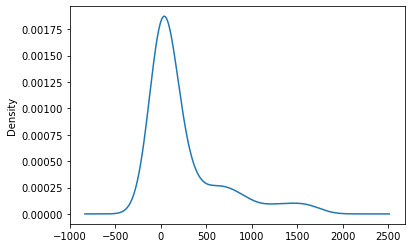

In [40]:
price_counts.plot.density()

In [41]:
# Create price bins
price_bins = [0, 15, 30, 60, 100, 500, 5000]
wine_data_clean.groupby(pd.cut(wine_data_clean["price"], price_bins)).count()

price_bins_names = ["<$15","$15-30","$30-60","$60-100", "100-500","too much"]

# Make a new column in dataframe for price bins.
wine_data_clean["price_bins"] = pd.cut(wine_data_clean["price"], price_bins, labels=price_bins_names)

# Check dataframe
wine_data_clean.tail()

,points,price,province,type,region,Latitude,Longitude,winery,variety,title,description,price_bins
55849,90,20.0,California,White,Mendocino County,39.550019,-123.438353,Apriori,Chardonnay,Apriori 2013 Chardonnay,"A Chardonnay with an unusual companion, 8% Sem...",$15-30
55851,90,35.0,California,Red,Sonoma County,38.577956,-122.988832,Arrowood,Cabernet Sauvignon,Arrowood 2010 Cabernet Sauvignon,This is classic in herbaceous aromas and flavo...,$30-60
55852,90,35.0,California,White,Napa Valley,38.502469,-122.265389,Flora Springs,Chardonnay,Flora Springs 2013 Barrel Fermented Chardonnay,There's no bones about the use of oak in this ...,$30-60
55854,90,35.0,California,Red,Napa Valley,38.502469,-122.265389,Hendry,Zinfandel,Hendry 2012 Blocks 7 & 22 Zinfandel,This opens with herbaceous dollops of thyme an...,$30-60
55856,90,75.0,Oregon,Red,Oregon,43.804133,-120.554201,Citation,Pinot Noir,Citation 2004 Pinot Noir,Citation is given as much as a decade of bottl...,$60-100


In [43]:
# Re-arrange column order for wine finder display.
dashboard_wine_data_df = wine_data_clean[['province', 'region', 'Latitude', 'Longitude',
                                                 'winery', 'variety', 'type', 'title', 'points',
                                                 'price', 'price_bins','description']]
print(dashboard_wine_data_df.shape)
dashboard_wine_data_df.head(1)

(35430, 12)


,province,region,Latitude,Longitude,winery,variety,type,title,points,price,price_bins,description
0,Oregon,Willamette Valley,44.942554,-122.933762,Rainstorm,Pinot Gris,White,Rainstorm 2013 Pinot Gris,87,14.0,<$15,"Tart and snappy, the flavors of lime flesh and..."


In [44]:
#Export data to csv
dashboard_wine_data_df.to_csv("Data/US_Wine_PriceBins.csv", index=False)

In [ ]:
# Create a DataFrame to hold columns ("description", "price", "province", "region_2", "title", "winery")
# that won't be used in machine learning in case we want them later.
US_wine_data_title_df = wine_data_clean.drop(columns=["points", "region_1", "variety","price_bins"], axis=1)
print(US_wine_data_title_df.shape)
US_wine_data_title_df.head()

In [ ]:
# Export data with price bins
# Save cleaned columns ("description", "price", "province", "region_2", "title", "winery","latitude", "longitude")
US_wine_data_title_df.to_sql(name='winedata', con=engine)

In [ ]:
# Save cleaned columns ("description", "price", "province", "region_2", "title", "winery")
# in case we want to load into database later.
US_wine_data_title_df.to_csv("Data/US_wine_data_title.csv", index=False)

In [ ]:
# Create DataFrame for machine learning model. Drop: "description" - of flavors, i.e. tart and snappy, 
# oaky, etc., price, province, region_2, "title" - name on the bottle, winery.
# Dropped lat and long

US_wine_data_df_ml = US_wine_data_df.drop(columns=["description", "price", "region", "province", "region_2", "title", "winery", "Latitude", "Longitude", "Place_id"], axis=1)
print(US_wine_data_df_ml.shape)
US_wine_data_df_ml.head()

In [ ]:
# Delete This 
#Save preprocessed dataframe (columns for machine learning: "points","region_1",""variety","price_bins")
US_wine_data_df_ml.to_csv("Data/US_wine_data_ml.csv", index=False)

In [ ]:
# Export data for ML: (columns for machine learning: "points","region_1",""variety","price_bins")
US_wine_data_df_ml.to_sql(name='winedata_ml', con=engine)

### Checkpoint

In [ ]:
# # Import data
# US_wine_data_df_ml = pd.read_csv("Data/US_wine_data_ml.csv")
# print(US_wine_data_df_ml.shape)
# US_wine_data_df_ml.head()

In [ ]:
# Look at unique values to see if categorical data requires binning
US_wine_data_df_ml.nunique()

In [ ]:
# Determine value_counts for binning
variety_counts = US_wine_data_df_ml.variety.value_counts()
variety_counts

In [ ]:
# Visualize the value counts of variety
variety_counts.plot.density()

In [ ]:
# Determine which values to replace.  Per the plot, we tried <500 but after looking
# results we decided that we wanted to be more inclusive since some mainstream wines
# would be binned in "other".  Therefore we lowered the threshold for other to 300.
replace_variety = list(variety_counts[variety_counts <= 300].index)

# Replace in dataframe
for variety in replace_variety:
    US_wine_data_df_ml.variety = US_wine_data_df_ml.variety.replace(variety,"Other")
    
# Check to make sure binning was successful
US_wine_data_df_ml.variety.value_counts()

In [ ]:
# Determine value_counts for binning
region_1_counts = US_wine_data_df_ml.region_1.value_counts()
region_1_counts

In [ ]:
# Visualize the value counts of region_1
region_1_counts.plot.density()

In [ ]:
# From the plot the curve breaks around 500.
replace_region_1 = list(region_1_counts[region_1_counts <= 300].index)

# Replace in dataframe
for region_1 in replace_region_1:
    US_wine_data_df_ml.region_1 = US_wine_data_df_ml.region_1.replace(region_1,"Other")
    
# Check to make sure binning was successful
US_wine_data_df_ml.region_1.value_counts()

### Encode categorical data

In [ ]:
# Create variable to hold categorical columns for OneHotEncoder
wine_cat = ["variety", "region_1"]

In [ ]:
# from sklearn.preprocessing import OneHotEncoder
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(US_wine_data_df_ml[wine_cat]))

# Add the encoded variable names to the dataframe
encode_df.columns = enc.get_feature_names(wine_cat)
encode_df.shape
encode_df.head()

In [ ]:
# Merge one-hot encoded features and drop the originals
US_wine_data_df_ml = US_wine_data_df_ml.merge(encode_df,left_index=True, right_index=True)
US_wine_data_df_ml = US_wine_data_df_ml.drop(wine_cat,axis=1)
print(US_wine_data_df_ml.shape)
US_wine_data_df_ml.head()

In [ ]:
# Save preprocessed dataframe to csv for future reference.
US_wine_data_df_ml.to_csv("Data/US_wine_data_enc.csv", index=False)

In [ ]:
# # Import data
# US_wine_data_df_ml = pd.read_csv("Data/US_wine_data_enc.csv")

### Split preprocessed data 

In [ ]:
# from sklearn.model_selection import train_test_split
# Split preprocessed data into our features and target arrays
#  Target
y = US_wine_data_df_ml["price_bins"].values
# Features
X = US_wine_data_df_ml.drop(["price_bins"],axis=1).values

In [ ]:
# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [ ]:
# from sklearn.preprocessing import StandardScaler
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [ ]:
print(X_train_scaled [0:5])

## Machine Learning

### Try RandomForestClassifier

In [ ]:
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
# Create a random forest classifier. 
rf_model = RandomForestClassifier(n_estimators=500, random_state=1) 

In [ ]:
# Fitting the model
rf_model = rf_model.fit(X_train_scaled, y_train)

In [ ]:
# Making predictions using the testing data.
y_pred = rf_model.predict(X_test_scaled)

In [ ]:
# Display the confustion matrix
# from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

In [ ]:
# Calculate the accuracy score
# from sklearn.metrics import accuracy_score, classification_report
acc_score = accuracy_score(y_test, y_pred)

In [ ]:
# Displaying results
print(f"Accuracy Score : {acc_score}")
print("Classification Report")
print(classification_report(y_test, y_pred))